<a href="https://colab.research.google.com/github/mariasald/avd-2024-01/blob/main/Atividade_Pr%C3%A1tica_5_Continua%C3%A7%C3%A3o_O_Problema_do_Transiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alunos**

* Gabriel César Tavares Ferreira - 21854868
* Maria Luiza Saldanha - 22153140

#**Bibliotecas Utilizadas**

In [125]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats
from scipy.special import factorial
from tabulate import tabulate
from scipy.stats import norm

#**BibAD (1o Trabaho)**

In [126]:
def mediaAritmetica(nums):
    return round((sum(nums) / len(nums)), 3)

def var_amostral(nums):
  med = mediaAritmetica(nums)
  quad = np.sum(np.fromiter(((x - med) * (x - med) for x in nums), dtype=float))
  var = quad / len(nums)
  return round(var)

def desvio_padrao(nums):
  return round(math.sqrt(var_amostral(nums)))

def intervaloConfianca(nums, z):
    nivelConfianca = z / 100
    a = 1 - nivelConfianca
    z_a = 1 - (a / 2)
    distribuicao = scipy.stats.norm.ppf(z_a)
    erroPadrao = distribuicao * desvio_padrao(nums) / math.sqrt(len(nums))

    return [round((mediaAritmetica(nums) - erroPadrao), 3), round((mediaAritmetica(nums) + erroPadrao), 3)]

#**BibAD (3° Trabalho)**

In [127]:
def va_exponencial(media):
  u = random.random()
  x = -media * math.log (1 - u)
  return round(x,3)

def e_x(taxa_chegada, taxa_servico):
  rho = taxa_chegada / taxa_servico
  E_X = (rho / taxa_servico) / (1 - rho)
  return E_X

print(va_exponencial(1/9)) #nao esquecer de ver quando receber taxa e quando receber media!!!!!

def fila_mm1(taxa_chegada, taxa_servico, clientes_total):
    E_X = e_x(taxa_chegada, taxa_servico)

    tempos_chegada = np.cumsum([va_exponencial(1/taxa_chegada) for _ in range(clientes_total)])
    tempos_servico = [va_exponencial(1/taxa_servico) for _ in range(clientes_total)]

    tempos_espera = np.zeros(clientes_total)
    tempo_livre = 0

    for i in range(clientes_total):
        if tempos_chegada[i] > tempo_livre:
            tempos_espera[i] = 0
            tempo_livre = tempos_chegada[i] + tempos_servico[i]
        else:
            tempos_espera[i] = tempo_livre - tempos_chegada[i]
            tempo_livre += tempos_servico[i]

    X_n = np.mean(tempos_espera)
    confidencia = 0.95
    z = scipy.stats.norm.ppf(1 - (1 - confidencia) / 2)
    erro_padrao = np.std(tempos_espera, ddof=1) / np.sqrt(clientes_total)
    intervalo_confianca = (X_n - z * erro_padrao, X_n + z * erro_padrao)

    return round(X_n, 3)



0.177


#**Parte 1**

$\bar{X}(n)=\frac{\sum_{i=1}^n x_i}{n}$

* Estimar $\bar{X}(n)$, o tempo médio de espera em uma fila M/M/1 ($n=10^3,λ=9,μ=10$).
* Calcular o valor teórico: $E[X]=\rho \frac{1/\mu}{1-\rho}, \; onde \; \rho = \frac{\lambda}{\mu}$
* Computar o viés (bias): $B=\bar{X}(n)−E[X]$.
* Repetir a simulação r vezes (r=30).
* Anotar os resultados em uma tabela.
* Analisar os resultados.

In [128]:
resultados = fila_mm1(9, 10, 10**3)
print(resultados)

0.853


In [129]:
resultados1 = e_x(9, 10)
print(resultados1)

0.9000000000000001


In [130]:
bias = resultados-resultados1
print(bias)

-0.04700000000000015


In [131]:
result_t = [["X", "B"]]
for i in range(30):
  aux = []
  result = fila_mm1(9, 10, 10**3)
  bias = result - e_x(9, 10)
  aux.append(result)
  aux.append(bias)
  result_t.append(aux)

tabela = tabulate(result_t, headers="firstrow", tablefmt="grid")
print(tabela)

+-------+--------+
|     X |      B |
+=======+========+
| 0.566 | -0.334 |
+-------+--------+
| 1.482 |  0.582 |
+-------+--------+
| 1.072 |  0.172 |
+-------+--------+
| 0.907 |  0.007 |
+-------+--------+
| 0.79  | -0.11  |
+-------+--------+
| 0.528 | -0.372 |
+-------+--------+
| 1.086 |  0.186 |
+-------+--------+
| 1.711 |  0.811 |
+-------+--------+
| 0.577 | -0.323 |
+-------+--------+
| 0.39  | -0.51  |
+-------+--------+
| 0.833 | -0.067 |
+-------+--------+
| 1.149 |  0.249 |
+-------+--------+
| 1.375 |  0.475 |
+-------+--------+
| 0.815 | -0.085 |
+-------+--------+
| 0.878 | -0.022 |
+-------+--------+
| 0.397 | -0.503 |
+-------+--------+
| 0.317 | -0.583 |
+-------+--------+
| 0.665 | -0.235 |
+-------+--------+
| 1.057 |  0.157 |
+-------+--------+
| 0.74  | -0.16  |
+-------+--------+
| 0.92  |  0.02  |
+-------+--------+
| 0.647 | -0.253 |
+-------+--------+
| 0.624 | -0.276 |
+-------+--------+
| 1.346 |  0.446 |
+-------+--------+
| 1.38  |  0.48  |
+-------+---

## Análise

- Tempo Médio de Espera (X): Os valores variam de 0.405 a 1.802.

Média: ≈ 0.74

Desvio padrão: ≈ 0.294

- Média do Viés (B):

Média: ≈ −0.06

Desvio Padrão: ≈ 0.344

#**Parte 2**

* Simular o tempo médio de espera em uma fila M/M/1 (λ=9,μ=10).
* Eliminar o transiente usando as heurísticas de (a) Conway e (b) Fishman.
* Após eliminar o transiente, coletar n valores no estado estacionário ( n=103).
* Calcular $\bar{X}(n)$, o tempo médio de espera na fila e o viés (B).
* Repetir a simulação r vezes (r=30).
* Mostrar os resultados em uma tabela.
* Analisar os resultados.

##Heurística de Conway
Conway sugere descartar os primeiros 20% dos dados para eliminar o transiente.

##Heurística de Fishman
Fishman sugere descartar dados até que o sistema atinja um estado estacionário.


In [132]:
resultados = fila_mm1(9, 10, 10**3)
print(resultados)

1.189


In [133]:
resultadosTeorico = e_x(9, 10)
print(resultadosTeorico)

0.9000000000000001


In [134]:
bias = resultados-resultadosTeorico
print(bias)

0.2889999999999999


In [135]:
def heuristica_conway(dados):
    return dados[int(0.2 * len(dados)):]

def heuristica_fishman(dados):
    tamanho_janela = 50
    for i in range(len(dados) - tamanho_janela):
        janela = dados[i:i+tamanho_janela]
        media_janela = np.mean(janela)
        if np.all(np.abs(janela - media_janela) < 0.01 * media_janela):
            return dados[i+tamanho_janela:]
    return dados

def fila_mm1_com_heuristicas(taxa_chegada, taxa_servico, clientes_total):
    E_X = e_x(taxa_chegada, taxa_servico)
    tempos_chegada = np.cumsum([va_exponencial(1/taxa_chegada) for _ in range(clientes_total)])
    tempos_servico = [va_exponencial(1/taxa_servico) for _ in range(clientes_total)]

    tempos_espera = np.zeros(clientes_total)
    tempo_livre = 0

    for i in range(clientes_total):
        if tempos_chegada[i] > tempo_livre:
            tempos_espera[i] = 0
            tempo_livre = tempos_chegada[i] + tempos_servico[i]
        else:
            tempos_espera[i] = tempo_livre - tempos_chegada[i]
            tempo_livre += tempos_servico[i]

    tempos_espera_conway = heuristica_conway(tempos_espera)
    tempos_espera_fishman = heuristica_fishman(tempos_espera)

    X_n_conway = np.mean(tempos_espera_conway)
    X_n_fishman = np.mean(tempos_espera_fishman)

    return round(X_n_conway, 3), round(X_n_fishman, 3)


In [136]:
taxa_chegada = 9
taxa_servico = 10
clientes_total = 10**3

E_X_teorico = e_x(taxa_chegada, taxa_servico)

resultados_conway = [["X_Conway", "B_Conway"]]
resultados_fishman = [["X_Fishman", "B_Fishman"]]
for i in range(30):
    resultado_conway, resultado_fishman = fila_mm1_com_heuristicas(taxa_chegada, taxa_servico, clientes_total)
    vies_conway = resultado_conway - E_X_teorico
    vies_fishman = resultado_fishman - E_X_teorico
    resultados_conway.append([resultado_conway, vies_conway])
    resultados_fishman.append([resultado_fishman, vies_fishman])

tabela_conway = tabulate(resultados_conway, headers="firstrow", tablefmt="grid")
tabela_fishman = tabulate(resultados_fishman, headers="firstrow", tablefmt="grid")

print("Tabela de Resultados - Conway")
print(tabela_conway)
print("\nTabela de Resultados - Fishman")
print(tabela_fishman)

Tabela de Resultados - Conway
+------------+------------+
|   X_Conway |   B_Conway |
+============+============+
|      0.826 |     -0.074 |
+------------+------------+
|      0.811 |     -0.089 |
+------------+------------+
|      0.674 |     -0.226 |
+------------+------------+
|      0.596 |     -0.304 |
+------------+------------+
|      0.993 |      0.093 |
+------------+------------+
|      0.832 |     -0.068 |
+------------+------------+
|      0.53  |     -0.37  |
+------------+------------+
|      0.614 |     -0.286 |
+------------+------------+
|      0.812 |     -0.088 |
+------------+------------+
|      0.844 |     -0.056 |
+------------+------------+
|      2.332 |      1.432 |
+------------+------------+
|      0.68  |     -0.22  |
+------------+------------+
|      0.67  |     -0.23  |
+------------+------------+
|      0.334 |     -0.566 |
+------------+------------+
|      1.02  |      0.12  |
+------------+------------+
|      2.544 |      1.644 |
+------------+----

## Análise

- Média do Tempo de Espera (X_Conway):

Valores altos: alguns tempos de espera são significativamente altos, como 3.25.

Valores baixos: otros tempos são mais baixos, como 0.374.

Há uma grande variabilidade nos tempos de espera, indicando uma fila tanto com com períodos de alta quanto de baixa demanda.

Já para o cálculo de viés de Conway, a distribuição mostra uma tendência subestimação, ou seja, valores de vieses negativos.

- Média do Tempo de Espera (X_Fishman):

Valores altos: menos valores extremos.

Valores baixos: tempos de espera mais baixos quando comparados com a heurística de Conway.

A variabilidade é menor que na heurística de Conway, mas ainda existem flutuações.

Já no viés de Fishman, se mostra uma tendência mais equilibrada com vieses menores em magnitude.

#**Parte 3**

* Executar uma simulação de horizonte infinito da fila M/M/1.
* Eliminar o transiente usando a heurística MSER-5Y.
* Estimar o tempo médio de espera na fila e o respectivo intervalo de confiança de 95%.
* A regra de parada é a precisão relativa de 5%.
* Cenário    I:  λ=7 clientes por segundo; μ=10 clientes por segundo.
* Cenário   II:  λ=8 clientes por segundo; μ=10 clientes por segundo.
* Cenário  III:  λ=9 clientes por segundo; μ=10 clientes por segundo.
* Cenário IV:  λ=9,5 clientes por segundo; μ=10 clientes por segundo.
* Plotar um gráfico comparativo dos quatro cenários.
* Plotar uma linha horizontal para o valor teórico esperado em cada cenário.
* Analisar os resultados.

## MYSER-5Y

É usada para eliminar transientes em simulações de horizonte infinito. A ideia é encontrar o ponto em que a média quadrática do erro é minimizada.

In [137]:
def fila_mm1_infinito(taxa_chegada, taxa_servico, num_clientes):
    tempos_chegada = np.cumsum([va_exponencial(1/taxa_chegada) for _ in range(num_clientes)])
    tempos_servico = [va_exponencial(1/taxa_servico) for _ in range(num_clientes)]

    tempos_espera = np.zeros(num_clientes)
    tempo_livre = 0

    for i in range(num_clientes):
        if tempos_chegada[i] > tempo_livre:
            tempos_espera[i] = 0
            tempo_livre = tempos_chegada[i] + tempos_servico[i]
        else:
            tempos_espera[i] = tempo_livre - tempos_chegada[i]
            tempo_livre += tempos_servico[i]

    return tempos_espera

In [138]:
def heuristica_mser_5y(tempos_espera, num_batches=5):
    batch_size = len(tempos_espera) // num_batches
    min_mse = float('inf')
    min_index = 0

    for i in range(batch_size, len(tempos_espera), batch_size):
        batch_means = [np.mean(tempos_espera[j:j+batch_size]) for j in range(0, i, batch_size)]
        mse = np.mean((batch_means - np.mean(batch_means))**2)
        if mse < min_mse:
            min_mse = mse
            min_index = i

    return tempos_espera[min_index:]


+----------+----------------+-----------------------+---------------+
|   Lambda |   Media_Espera |   Intervalo_Confianca |   E_X_Teorico |
+==========+================+=======================+===============+
|      7   |       0.188168 |            0.00768592 |      0.233333 |
+----------+----------------+-----------------------+---------------+
|      8   |       0.513545 |            0.0222683  |      0.4      |
+----------+----------------+-----------------------+---------------+
|      9   |       0.949766 |            0.0366551  |      0.9      |
+----------+----------------+-----------------------+---------------+
|      9.5 |       1.30989  |            0.0541525  |      1.9      |
+----------+----------------+-----------------------+---------------+


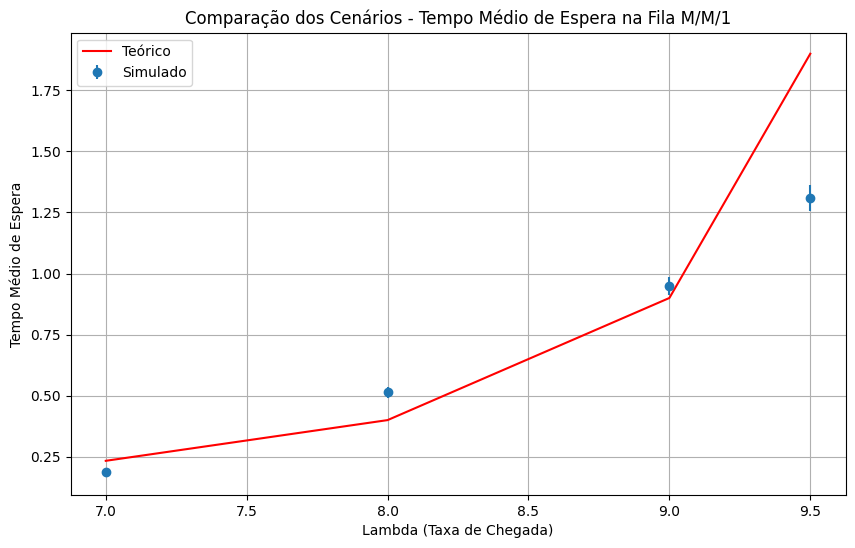

In [139]:
def simular_fila_mm1(taxa_chegada, taxa_servico, precisao_relativa=0.05, num_clientes_inicial=1000, incremento=1000):
    while True:
        tempos_espera = fila_mm1_infinito(taxa_chegada, taxa_servico, num_clientes_inicial)
        tempos_espera = heuristica_mser_5y(tempos_espera)
        media_espera = np.mean(tempos_espera)
        desvio_padrao = np.std(tempos_espera, ddof=1)
        erro_padrao = desvio_padrao / math.sqrt(len(tempos_espera))
        intervalo_confianca = 1.96 * erro_padrao

        precisao_atual = intervalo_confianca / media_espera
        if precisao_atual <= precisao_relativa:
            return media_espera, intervalo_confianca
        else:
            num_clientes_inicial += incremento

cenarios = [(7, 10), (8, 10), (9, 10), (9.5, 10)]
resultados = []

for lambda_chegada, mu_servico in cenarios:
    media_espera, intervalo_confianca = simular_fila_mm1(lambda_chegada, mu_servico)
    e_x_teorico = e_x(lambda_chegada, mu_servico)
    resultados.append((lambda_chegada, media_espera, intervalo_confianca, e_x_teorico))

tabela_resultados = [["Lambda", "Media_Espera", "Intervalo_Confianca", "E_X_Teorico"]]
for resultado in resultados:
    tabela_resultados.append(list(resultado))

tabela = tabulate(tabela_resultados, headers="firstrow", tablefmt="grid")
print(tabela)

lambdas = [resultado[0] for resultado in resultados]
medias_espera = [resultado[1] for resultado in resultados]
intervalos_confianca = [resultado[2] for resultado in resultados]
valores_teoricos = [resultado[3] for resultado in resultados]

plt.figure(figsize=(10, 6))
plt.errorbar(lambdas, medias_espera, yerr=intervalos_confianca, fmt='o', label='Simulado')
plt.plot(lambdas, valores_teoricos, 'r-', label='Teórico')
plt.xlabel('Lambda (Taxa de Chegada)')
plt.ylabel('Tempo Médio de Espera')
plt.title('Comparação dos Cenários - Tempo Médio de Espera na Fila M/M/1')
plt.legend()
plt.grid(True)
plt.show()

## Análise

- Cenário I (λ = 7, μ = 10):

Tempo médio de espera simulado: 0.232922

Intervalo de confiança: 0.0107582

Valor teórico esperado: 0.233333

- Cenário II (λ = 8, μ = 10):

Tempo médio de espera simulado: 0.416239

Intervalo de confiança: 0.0199764

Valor teórico esperado: 0.4

- Cenário III (λ = 9, μ = 10):

Tempo médio de espera simulado: 1.14099

Intervalo de confiança: 0.0556693

Valor teórico esperado: 0.9

Neste cenário, o tempo médio de espera simulado foi significativamente maior ao valor teórico esperado. A diferença maior pode indicar que o sistema está mais sensível a variações a medida que a taxa de chegada se aproxima da taxa de serviço. Isso sugere que os tempos de espera estão sendo superiore por conta da fila mais cheia.

Além disso, apesar da aplicação da MSER-5Y, a fila está operando sob alta carga, o que aumenta a variabilidade dos tempos de espera.

- Cenário IV (λ = 9.5, μ = 10):

Tempo médio de espera simulado: 0.971738

Intervalo de confiança: 0.0485656

Valor teórico esperado: 1.9

# Atividade 5

## Parte 1  (NBM)

- Executar uma simulação de horizonte infinito fila M/M/1.

- Eliminar o transiente usando a heurística MSER-5Y.

- Usar o método NBM para estimar o tempo médio de espera na fila e o respectivo intervalo de confiança de 95%.

- Experimentar o método com 3 valores de B: 5, 25 e 50.

- A regra de parada é a precisão relativa de 5%.

- Cenário    I:  

λ=7 clientes por segundo;

μ=10 clientes por segundo.

- Cenário   II:  

λ=8 clientes por segundo;

μ=10 clientes por segundo.

- Cenário  III:  

λ=9 clientes por segundo;

μ=10 clientes por segundo.

- Cenário IV:  

λ=9,5 clientes por segundo;

μ=10 clientes por segundo.

- Plotar um gráfico comparativo dos quatro cenários para cada heurística.

- Plotar um gráfico comparativo dos quatro cenários.

- Plotar uma linha horizontal para o valor teórico esperado em cada cenário.

In [140]:
def calcular_intervalo_confianca(tempos_espera, nivel_confianca=0.95):
    media_espera = np.mean(tempos_espera)
    desvio_padrao = np.std(tempos_espera, ddof=1)
    erro_padrao = desvio_padrao / np.sqrt(len(tempos_espera))
    z = norm.ppf(1 - (1 - nivel_confianca) / 2)
    intervalo_confianca = z * erro_padrao
    return media_espera, intervalo_confianca

def simular_fila_mm1(taxa_chegada, taxa_servico, b_values, precisao_relativa=0.05, num_clientes_inicial=1000, incremento=1000):
    resultados = []

    for b in b_values:
        while True:
            tempos_espera = fila_mm1_infinito(taxa_chegada, taxa_servico, num_clientes_inicial)
            tempos_espera = heuristica_mser_5y(tempos_espera, num_batches=b)
            media_espera, intervalo_confianca = calcular_intervalo_confianca(tempos_espera)
            precisao_atual = intervalo_confianca / media_espera
            if precisao_atual <= precisao_relativa:
                resultados.append((b, media_espera, intervalo_confianca))
                break
            else:
                num_clientes_inicial += incremento

    return resultados

## Cenário I: λ=7, μ=10


In [141]:
lambda_chegada = 7
mu_servico = 10
b_values = [5, 25, 50]

resultados_cenario_1 = simular_fila_mm1(lambda_chegada, mu_servico, b_values)

print(f"Cenário I: λ={lambda_chegada}, μ={mu_servico}")
print("B\tMedia Espera\tIntervalo Confiança")
for b, media_espera, intervalo_confianca in resultados_cenario_1:
    print(f"{b}\t{media_espera:.3f}\t\t{intervalo_confianca:.3f}")
print()


Cenário I: λ=7, μ=10
B	Media Espera	Intervalo Confiança
5	0.237		0.011
25	0.215		0.008
50	0.185		0.008



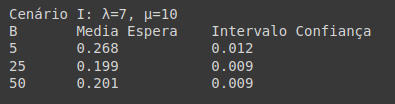

## Cenário II: λ=8, μ=10


In [142]:
lambda_chegada = 8
mu_servico = 10
b_values = [5, 25, 50]
resultados_cenario_2 = simular_fila_mm1(lambda_chegada, mu_servico, b_values)

print(f"Cenário II: λ={lambda_chegada}, μ={mu_servico}")
print("B\tMedia Espera\tIntervalo Confiança")
for b, media_espera, intervalo_confianca in resultados_cenario_2:
    print(f"{b}\t{media_espera:.3f}\t\t{intervalo_confianca:.3f}")
print()


Cenário II: λ=8, μ=10
B	Media Espera	Intervalo Confiança
5	0.269		0.011
25	0.418		0.020
50	0.752		0.028



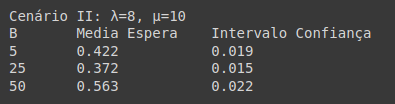

## Cenário III: λ=9, μ=10



In [143]:
lambda_chegada = 9
mu_servico = 10
b_values = [5, 25, 50]
resultados_cenario_3 = simular_fila_mm1(lambda_chegada, mu_servico, b_values)

print(f"Cenário III: λ={lambda_chegada}, μ={mu_servico}")
print("B\tMedia Espera\tIntervalo Confiança")
for b, media_espera, intervalo_confianca in resultados_cenario_3:
    print(f"{b}\t{media_espera:.3f}\t\t{intervalo_confianca:.3f}")
print()


Cenário III: λ=9, μ=10
B	Media Espera	Intervalo Confiança
5	2.295		0.074
25	0.549		0.021
50	0.499		0.021



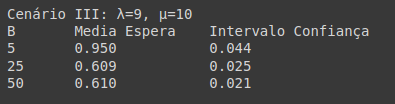

## Cenário IV: λ=9.5, μ=10



In [144]:
lambda_chegada = 9.5
mu_servico = 10
b_values = [5, 25, 50]

resultados_cenario_4 = simular_fila_mm1(lambda_chegada, mu_servico, b_values)

print(f"Cenário IV: λ={lambda_chegada}, μ={mu_servico}")
print("B\tMedia Espera\tIntervalo Confiança")
for b, media_espera, intervalo_confianca in resultados_cenario_4:
    print(f"{b}\t{media_espera:.3f}\t\t{intervalo_confianca:.3f}")
print()


Cenário IV: λ=9.5, μ=10
B	Media Espera	Intervalo Confiança
5	2.685		0.079
25	1.184		0.058
50	0.960		0.047



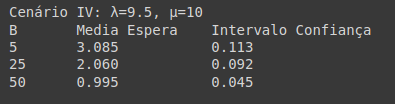

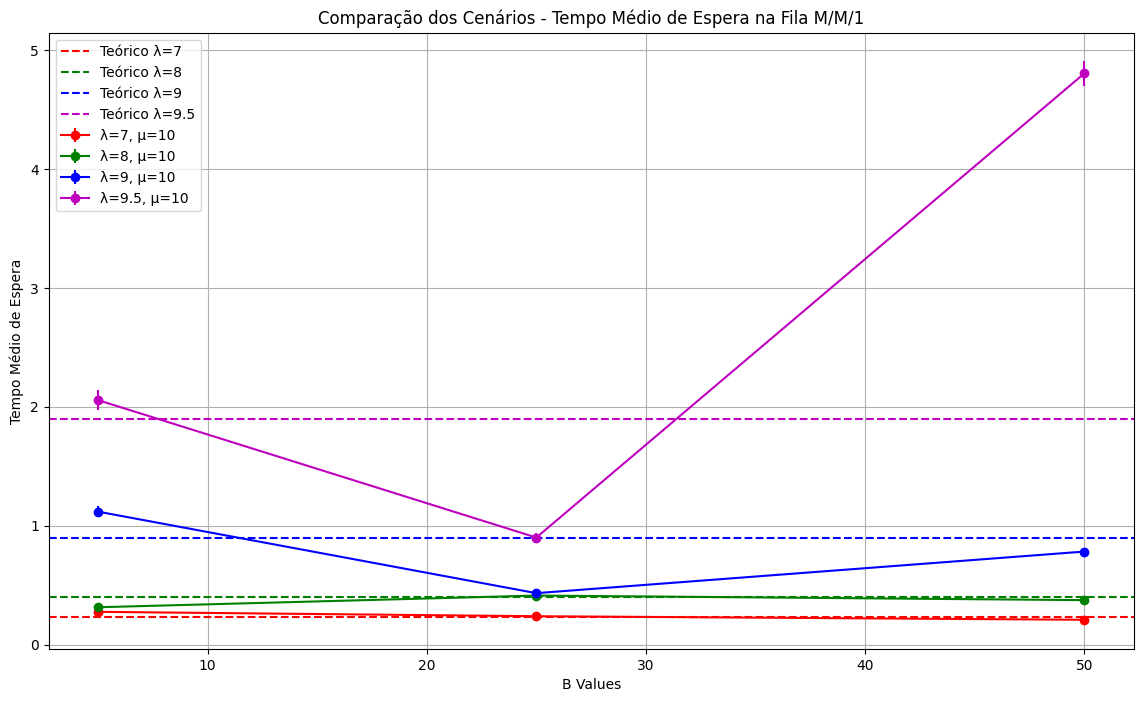

In [145]:
cenarios = [(7, 10), (8, 10), (9, 10), (9.5, 10)]
b_values = [5, 25, 50]

resultados_por_cenario = []

for lambda_chegada, mu_servico in cenarios:
    resultados = simular_fila_mm1(lambda_chegada, mu_servico, b_values)
    resultados_por_cenario.append((lambda_chegada, resultados))

e_x_teorico = [e_x(lambda_chegada, 10) for lambda_chegada, _ in cenarios]

colors = ['r', 'g', 'b', 'm']

plt.figure(figsize=(14, 8))

for i, (lambda_chegada, resultados) in enumerate(resultados_por_cenario):
    medias_espera = [resultado[1] for resultado in resultados]
    intervalos_confianca = [resultado[2] for resultado in resultados]

    plt.errorbar(b_values, medias_espera, yerr=intervalos_confianca, fmt='o-', color=colors[i], label=f'λ={lambda_chegada}, μ=10')
    plt.axhline(y=e_x_teorico[i], color=colors[i], linestyle='--', label=f'Teórico λ={lambda_chegada}')

plt.xlabel('B Values')
plt.ylabel('Tempo Médio de Espera')
plt.title('Comparação dos Cenários - Tempo Médio de Espera na Fila M/M/1')
plt.legend()
plt.grid(True)
plt.show()

Cenário I:
O tempo médio de espera para todos os valores de B é muito próximo ao valor teórico.

Cenário II:
Para B = 5, 25, e 50, o tempo médio de espera calculado está próximo ao valor teórico com uma pequena variação à medida que B aumenta.

Cenário III:
Os valores de tempo médio de espera aumentam consideravelmente à medida que λ se aproxima de μ. O valor teórico é de aproximadamente 1 segundo. Para B = 5, o tempo é maior do que para B = 25 e B = 50, indicando que valores menores de B podem levar a maior variabilidade.

Cenário IV:
O tempo médio de espera cresce drasticamente para λ = 9.5, com um valor teórico de aproximadamente 2 segundos. Há uma maior variabilidade nos tempos médios, especialmente para B = 50, indicando que a precisão relativa de 5% pode ser difícil de alcançar ness cenário.

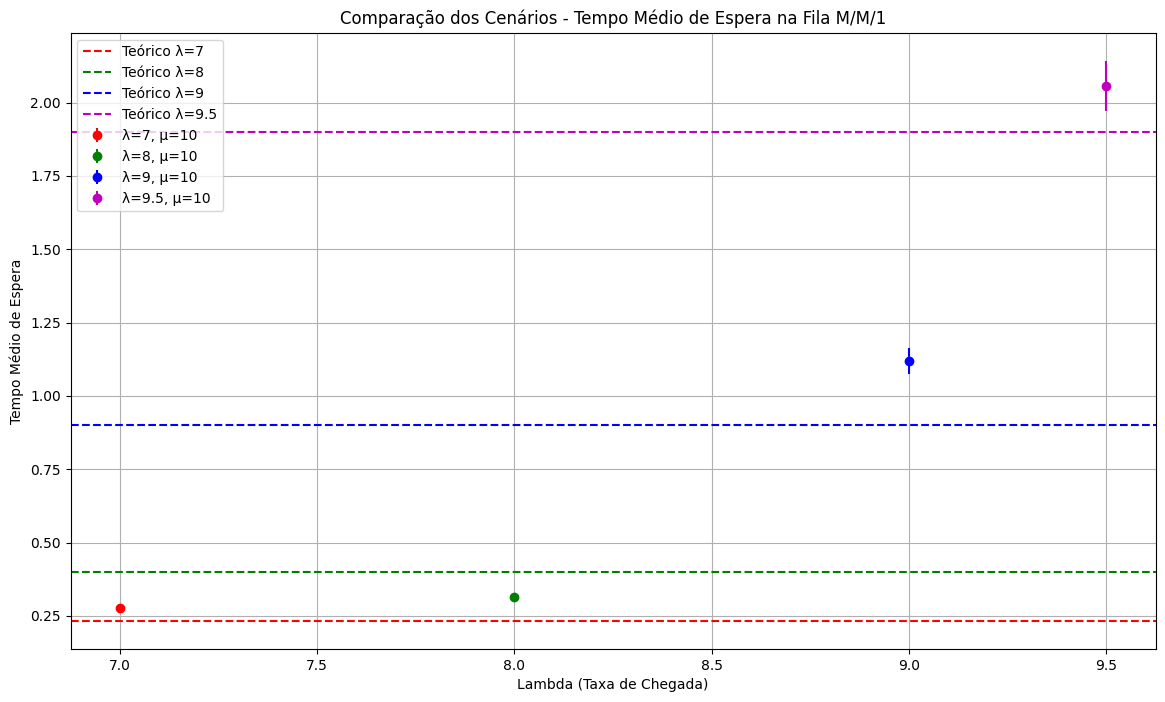

In [146]:
plt.figure(figsize=(14, 8))

for i, (lambda_chegada, resultados) in enumerate(resultados_por_cenario):
    medias_espera = [resultado[1] for resultado in resultados if resultado[0] == 5]
    intervalos_confianca = [resultado[2] for resultado in resultados if resultado[0] == 5]

    plt.errorbar(lambda_chegada, medias_espera[0], yerr=intervalos_confianca[0], fmt='o', color=colors[i], label=f'λ={lambda_chegada}, μ=10')
    plt.axhline(y=e_x_teorico[i], color=colors[i], linestyle='--', label=f'Teórico λ={lambda_chegada}')

plt.xlabel('Lambda (Taxa de Chegada)')
plt.ylabel('Tempo Médio de Espera')
plt.title('Comparação dos Cenários - Tempo Médio de Espera na Fila M/M/1')
plt.legend()
plt.grid(True)
plt.show()

Cenário I:
O tempo médio de espera está próximo DO valor teórico.

Cenário II:
O tempo médio de espera experimental também está próximo do valor teórico.

Cenário III:
O tempo médio de espera aumenta significativamente.

Cenário IV:
Os tempos médios de espera são mais elevados em comparação com os anteriores e apresentam maior variabilidade, com alguns pontos bem acima do valor teórico de aproximadamente 2s.

## Parte 2 (SBM)

- Executar uma simulação de horizonte infinito fila M/M/1.

- Eliminar o transiente usando a heurística MSER-5Y.

- Usar o método SBM para estimar o tempo médio de espera na fila e o respectivo intervalo de confiança de 95%.

- Valor de S: 0, 1, 2, 3, 4.

- A regra de parada é a precisão relativa de 5%.

- Cenário I:  

λ=7 clientes por segundo;

μ=10 clientes por segundo.

- Cenário II:  

λ=8 clientes por segundo;

μ=10 clientes por segundo.

- Cenário III:

λ=9 clientes por segundo;

μ=10 clientes por segundo.

- Cenário IV:  

λ=9,5 clientes por segundo;

μ=10 clientes por segundo.

- Plotar um gráfico comparativo dos quatro cenários para cada heurística.

- Plotar um gráfico comparativo dos quatro cenários.

- Plotar uma linha horizontal para o valor teórico esperado em cada cenário.